# Machine Learning and Statistics Project, November 2019
***

## **Submitted by:** Francis Adepoju (G00364694)
***
## __Title:__ Using Descriptive Statistics and Plots to Describe the Boston House Prices Dataset 
***


## Summary of the dataset:
#### The Boston data frame has 506 rows and 14 columns. This data frame contains the following columns:
1. __crim__   - per capita crime rate by town.
2. __zn__     - proportion of residential land zoned for lots over 25,000 sq.ft.
3. __indus__  - proportion of non-retail business acres per town.
4. __chas__   - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
5. __nox__    - nitrogen oxides concentration (parts per 10 million).
6. __rm__     - average number of rooms per dwelling.
7. __age__    - proportion of owner-occupied units built prior to 1940.
8. __dis__    - weighted mean of distances to five Boston employment centres.
9. __rad__    - index of accessibility to radial highways.
10. __tax__    - full-value property-tax rate per **`$10,000`**.
11. __ptratio__  - pupil-teacher ratio by town.
12. __black__  - `1000 * (Bk - 0.63)^2` where Bk is the proportion of blacks by town.
13. __lstat__  - lower status of the population (percent).
14. __medv__  - median value of owner-occupied homes in **`$1,000`**.

#### NOTE: 
1. The __medv__ variable is the target (y) variable. The prices of the house indicated by the __medv__ variable is therefore our target variable and the remaining 13 are the feature variables.The effect of the these 13 variables on house prices are to be investigated and predicted.
2. In this project, we use the Python[1], scipy[2], keras[3], and Jupyter[4] packages to produce a comprehensive description, inference and prediction of house prices using the Boston house prices' dataset [5] 

***
## 1. Description
***

#### Import necessary Libraries

In [44]:
# Library for generating random variables.
import numpy as np
# Library for handling data.
import pandas as pd
# Library for plotting.
import matplotlib.pyplot as plt
# Library for t-tests and ANOVA.
import scipy.stats as stats


import seaborn as sns

# For basic ML,
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.linalg as sl

# For more practical ML,  Import linear_model from sklearn.
import sklearn.linear_model as lm

# random number gen
from random import sample

# Make the plots bigger.
plt.rcParams['figure.figsize'] = (20.0, 10.0)

### 1.1 Load Dataset from my gitHub repository and gain some insight about the dataset

In [45]:
# Let's use pandas to read this csv file and organise the housing data.
# Load the boston-housing dataset... This is the URL from "raw" version of housing.csv file from my github
#df = pd.read_csv("housingCSV2.csv")
df = pd.read_csv("https://raw.githubusercontent.com/dewaledr/MLearning-Projects/master/housing.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [46]:
df.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [47]:
# Investigate the data for missing or non values...
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


To get some basic statistics about our data like mean, median, count etc. we can use __.describe()__ method as shown below:

In [48]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### 1.2 Data Clean up...
Generally, NaN or missing values can be in any form like 0, ?, or may be written as “missing” and as observed in our dataset above __(chas and zn)__, there are a lot of  0’s, so we can replace them with NaN to calculate how much data we are missing [6].

In [49]:
# Make a copy of the dataset
df2 = df.copy(deep=True)

In [50]:
#print(df2.head())
df2.zn.replace(0, np.nan, inplace=True)
df2.chas.replace(0, np.nan, inplace=True)

In [51]:
#After replacing let’s again use .info() method to see the details about missing values in our dataset:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         134 non-null float64
indus      506 non-null float64
chas       35 non-null float64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [52]:
df2.isnull().sum()/len(df2)*100

crim        0.000000
zn         73.517787
indus       0.000000
chas       93.083004
nox         0.000000
rm          0.000000
age         0.000000
dis         0.000000
rad         0.000000
tax         0.000000
ptratio     0.000000
black       0.000000
lstat       0.000000
medv        0.000000
dtype: float64

#### 1.2.2 Calculate the percentageof features with missing values
Generally, if there is 20-25% missing values we can impute them with different ways like mean, median or an educated guess by us. But if it’s more than that, it’s better to remove those features otherwise they can affect our result. As we can see below both “zn” and “chas” missing more than 70% data so we will remove both these features.

In [53]:
df2 = df2.drop("zn", 1)
df2 = df2.drop("chas", 1)

In [54]:
df2.head()

,crim,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### 1.3 Multi-Linear Regression on the dataset - Statsmodel

In [55]:
# Let's pretend we want to do linear regression on these variables.
x = df2[['crim', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 
          'ptratio', 'black', 'lstat']]

In [56]:
# # price relationship.
y = df['medv']

In [57]:
# Tell statmodels to include an intercept.
xwithc = sm.add_constant(x)

# Create a model.
msm = sm.OLS(y, xwithc)

# Fit the data.
rsm = msm.fit()

# Print a summary.
print(rsm.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     121.0
Date:                Tue, 12 Nov 2019   Prob (F-statistic):          1.87e-132
Time:                        11:19:17   Log-Likelihood:                -1509.6
No. Observations:                 506   AIC:                             3043.
Df Residuals:                     494   BIC:                             3094.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.3083      5.200      7.175      0.0

### 1.3.1 HINT:
The condition number is large, 15,100. This might indicate that there are strong multicollinearity or other numerical problems... Need to investigate this!
In statistics, multicollinearity (also collinearity) is a phenomenon in which one predictor variable in a multiple regression model can be linearly predicted from the others with a substantial degree of accuracy. In this situation the coefficient estimates of the multiple regression may change erratically in response to small changes in the model or the data. Multicollinearity does not reduce the predictive power or reliability of the model as a whole, at least within the sample data set; it only affects calculations regarding individual predictors. That is, a multivariate regression model with collinear predictors can indicate how well the entire bundle of predictors predicts the outcome variable, but it may not give valid results about any individual predictor, or about which predictors are redundant with respect to others.[7]

***
### Multi-linear regression on the dataset - SKLearn.
[https://scikit-learn.org/stable/](https://scikit-learn.org/stable/)

In [58]:
# Create a linear regression model instance.
m = lm.LinearRegression()

#### 1.3.2:
Assuming that the following Linear Relationship exists between the remaining features and the output (house prices):
***

$$ medv = int+ a (crim) + b (indus)  + c (nox) + d (rm) + e (age) + 
          f (dis) + g (rad) + h (tax) + i (ptratio) + j (black) + k (lstat) $$
int = intercept
***

In [59]:
# Ask our model to fit the data.
m.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
# Here's our intercept.
m.intercept_

37.30833678353185

In [61]:
# Here's our coefficients, in order.
m.coef_

array([-1.03402051e-01,  1.82116406e-02, -1.78291762e+01,  4.07437888e+00,
       -2.64677545e-03, -1.21018231e+00,  3.04603188e-01, -1.09013226e-02,
       -1.13114598e+00,  9.85349521e-03, -5.25072184e-01])

In [62]:
# See how good our fit is.
m.score(x, y)

0.7293219233110855

### REMARKS:
These results agree largely with those from statsmodel. Therefore, we can use statsmodel or sklearn for the descriptive analysis.
Statsmodel involves calling fewer command to achieve the same outputs as sklearn
Statsmodels fared quite well with Panda's data frames while sklearn models work with arrays (ndarray).

### Generate some data and predict house prices based upon those with sklearn

### 1.3.3 Histogram:
Now let’s plot the histogram of all the available features to see the distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c29209bd0>,
      dtype=object)

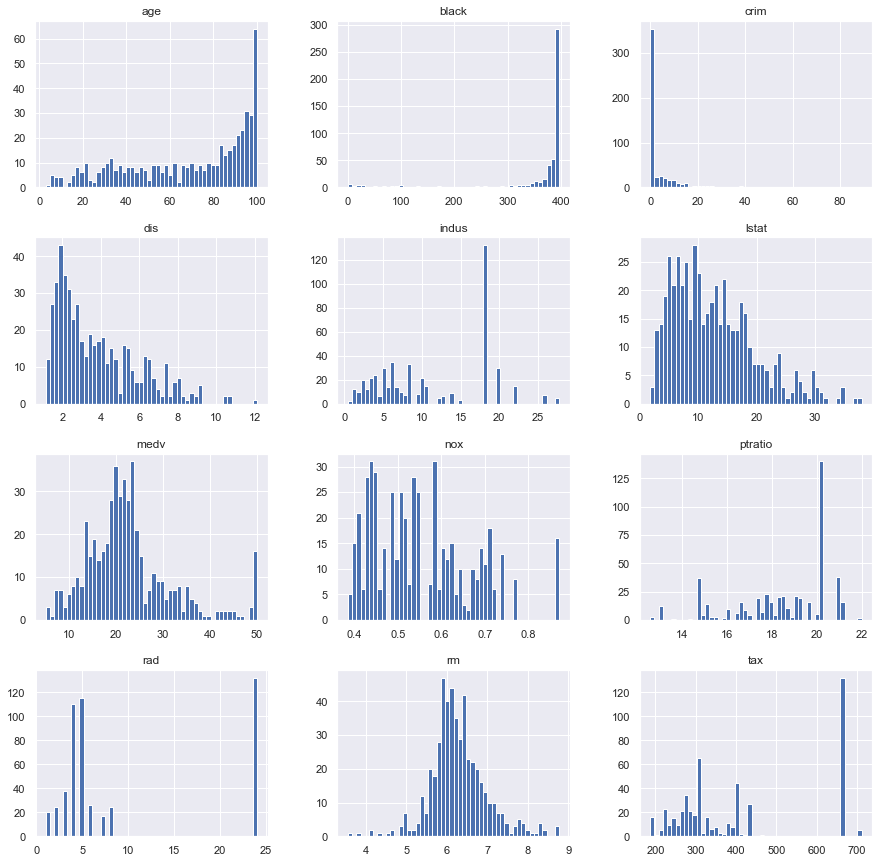

In [63]:
df2.hist(bins=50, figsize=(15, 15))

### 1.3.4 Correlation:
Now let’s check the correlation between all the feature variable and target variable by plotting the heatmap as shown below:

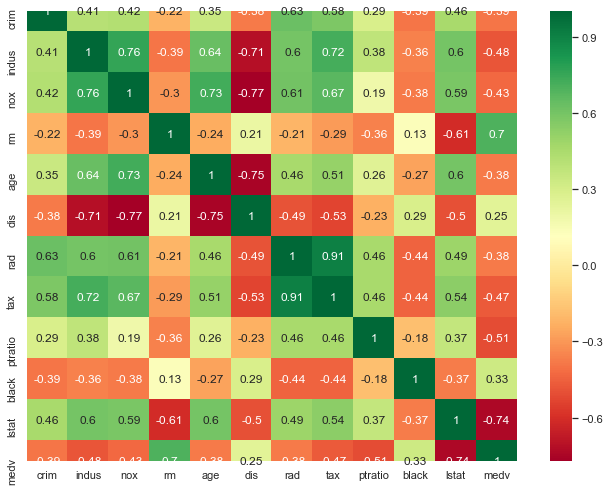

In [64]:
### set the size of the figure
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df2.corr().round(2), square=True, cmap='RdYlGn', annot=True)

### Observation from Heat Map:
- From the above correlation plot, we can see that MEDV is strongly correlated to LSTAT, RM
- RAD and TAX are strongly correlated, so we don’t include this in our features together to avoid multicollinearity. Similar to the features DIS and AGE which have a correlation of -0.75. So we will exclude these four features from our features list.


### NOTE:
From Heat map above, we know that it will be neat to exclude the following features, in addition to the earlier ones from the regression equation:
__(zn, chas, medv,rad, tax, dis, age)__
As Scikit learn wants “features” and “target” variables in X and Y respectively. Here __medv__ is our target variable, we can extract features and target arrays from our dataset as shown below. From X we drop the medv column along with other features and in y we keep only medv column:

In [65]:
xdrop = df2.drop(["medv","rad","tax","dis","age"], 1).values
y3 = df2["medv"].values


In [66]:
# Let's re-do linear regression on these variables.
x3 = df2[['crim', 'indus', 'nox', 'rm', 'ptratio', 'black', 'lstat']]

In [67]:
# # Tell statmodels to include an intercept.
xwithc = sm.add_constant(x3)

# Create a model.
msm = sm.OLS(y3, xwithc)
# Fit the data.
rsm = msm.fit()
# Print a summary.
print(rsm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     158.2
Date:                Tue, 12 Nov 2019   Prob (F-statistic):          3.22e-122
Time:                        11:19:21   Log-Likelihood:                -1544.1
No. Observations:                 506   AIC:                             3104.
Df Residuals:                     498   BIC:                             3138.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8620      4.548      2.828      0.0

/Users/francisadepoju/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### 1.3.4.1 HINT:
The condition number is is still large (7760,) but better than earlier (15,100). This might indicate that there are still strong multicollinearity or other numerical problems... Need to investigate this further!

***
### Turning to Statistics:
1. Features with high coefficients should be included in the regression
2. For multi-linear regression, adjusted R-squared is one of the most common measures of goodness of fit. In other words it is a universal measure to evaluate how well linear regressions fair and compare.[7]. It is a much more appropriate measure for a multiple linear regression because it steps on the R-squared and adjusts for the number of variables included in the model. If we are using features with little or no explanatory power. The R squared would increase nonetheless.
3. As observed, adjusted R-squared is still much lower than the R-squared this indicates that one or more of the predictors have little or no explanatory power, so more investigation is needed.
4. Turning to the Summary report from the statsmodel, we were given the p values of the features which we later use to determine whether the independent variables were relevant for the model. If a variable has a **p value above 0.05** we can disregard it. Thus (crim, indus and nox should be dropped)
***

In [68]:
xdrop = df2.drop(["medv","rad","tax","dis","age","crim","indus","nox"], 1).values
y4 = df2["medv"].values

In [69]:
# Let's re-do linear regression on these variables.
x4 = df2[[ 'rm', 'ptratio', 'black', 'lstat']]

In [70]:
# # Tell statmodels to include an intercept.
xwithc = sm.add_constant(x4)

# Create a model.
msm = sm.OLS(y4, xwithc)
# Fit the data.
rsm = msm.fit()
# Print a summary.
print(rsm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     275.9
Date:                Tue, 12 Nov 2019   Prob (F-statistic):          4.10e-125
Time:                        11:19:21   Log-Likelihood:                -1545.8
No. Observations:                 506   AIC:                             3102.
Df Residuals:                     501   BIC:                             3123.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.0548      4.220      2.857      0.0

***
### 1.4 Summary Observation:
1. The condition number is is still large (6,810) but better than earlier (7,760). This indicates that there are still strong multicollinearity or other numerical problems.
2. Adjusted R-squared is still lower than the R-squared but better than previous prediction. This indicates that one or more of the predictors still have little or no explanatory power.
3. There are no more features with p value > 0.05
***

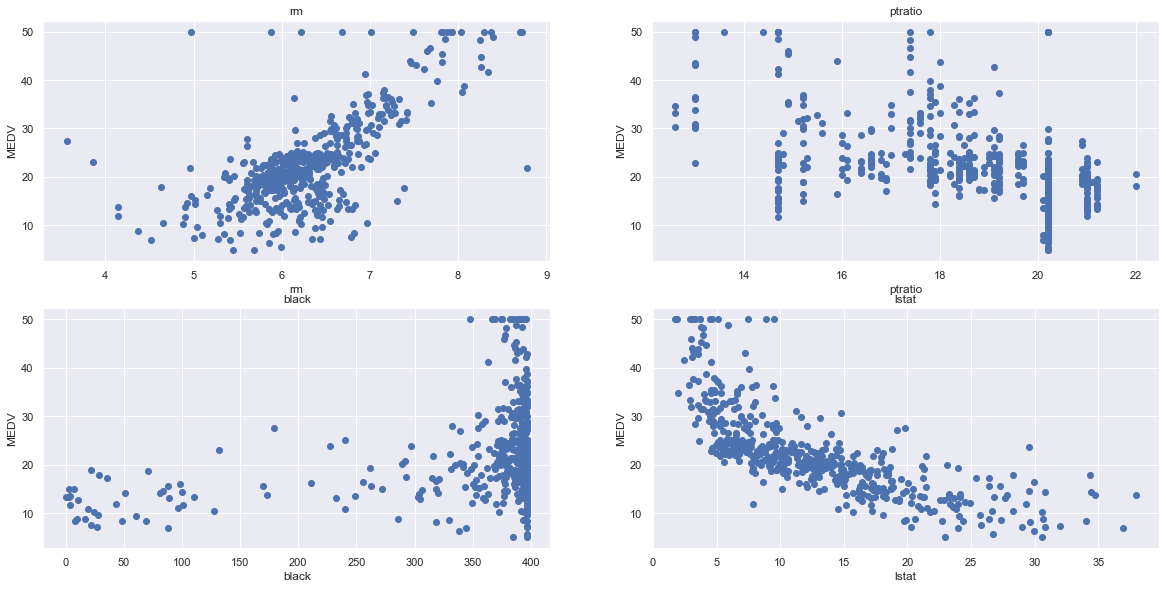

In [71]:
plt.figure(figsize=(20, 15))
#features = ['crim','indus','nox','rm','ptratio','black','lstat']
features = ['rm','ptratio','black','lstat']
target = df2['medv']
for i, col in enumerate(features):
    plt.subplot(3, len(features)/2 , i+1)
    x3 = df2[col]
    y3 = target
    plt.scatter(x3, y3, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')


From the above visualization, we can conclude that **medv** and **rm** are linearly correlated and medv increase with an increase in rm which is number of rooms and looks like both are following a linear relationship. Also when population of lower status percentage __(lstat)__ increases,house price __(medv)__ or price decreases.

***
## 2. Inference
***

Inferential statistics use a random sample of data taken from a population to describe and make inferences about the population. Inferential statistics are valuable when examination of each member of an entire population is not convenient or possible.
Inferential statistics use statistical models to help compare the sample data to other samples or to previous research. 
https://www.statisticshowto.datasciencecentral.com/inferential-statistics/
Most research uses statistical models called the Generalized Linear model and include Student’s t-tests, ANOVA (Analysis of Variance), regression analysis and various other models that result in straight-line (“linear”) probabilities and results. The main indexes for inferential statistics articles are:
* Binomial Theorem
* Hypothesis Testing
* Normal Distributions
* T-Distributions
* Central Limit Theorem
* Confidence Intervals
* Regression Analysis / Linear Regression
* Comparison of Means.


In [72]:
# Let's make a copy of the dataset and then separate the chars column to show houses that are along the Charles river
# (chas = 1) and those that are not (chas = 0);
df3 = df.copy(deep=True)
print(df3.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [73]:
df3_0 = df[df3['chas'] == 0]
df3_1 = df[df3['chas'] == 1]
n_0 = df3_0['chas'].count()
n_1 = df3_1['chas'].count()

In [74]:
print(n_0)
print(n_1)


471
35


### NOTE:
Above count shows there are **35** houses bounds the Charles river while **471** houses do not.
To make a reasonable inference with t-test or Anova, a random sample of 30 houses are selected from each group as follows:

In [75]:
# given data frame df3
# create random index of 30 out of the lot
rindex_0 =  np.array(sample(range(len(df3_0)), 30))
rindex_1 =  np.array(sample(range(len(df3_1)), 30))
# print(rindex_0)
# print(rindex_1)
# get 30 random rows from each of the dataframes and then print them out (using iloc for positional indexing)
dfr_0 = df3_0.iloc[rindex_0]
dfr_1 = df3_1.iloc[rindex_1]
# print(dfr_0)
# print(dfr_1)

# Count the samples.
nA = dfr_0['chas'].count()
nB = dfr_1['chas'].count()
print(f'Bounded houses   = {nA}')
print(f'Unbounded houses = {nB}')

# Calculate the means.
mA = dfr_0['medv'].sum() / nA
mB = dfr_1['medv'].sum() / nB

# Print to 2 decimal places
print(f"mean of medv for Bounded houses   = {mA:.2f}")
print(f"mean of medv for Unbounded houses = {mB:.2f}")

Bounded houses   = 30
Unbounded houses = 30
mean of medv for Bounded houses   = 22.07
mean of medv for Unbounded houses = 27.59


In [76]:
# Set parameters for two populations.
popA = {'m': mA, 's': 0.10}
popB = {'m': mB, 's': 0.10}

# # Create two samples, one from each population.
# # Create two samples, one from each population.
# sampA = np.random.normal(popA['m'], popA['s'], 100)

sampA = np.random.normal(popA['m'], popA['s'], 30)
sampB = np.random.normal(popB['m'], popB['s'], 30)
print(sampA)
print(sampB)

[22.08911452 22.06796831 21.96025775 22.1114058  22.03330448 22.04664326
 21.98505474 22.06717985 21.98113052 22.07526372 22.02069036 22.00151604
 22.31264031 21.94320839 21.98692956 22.2262664  22.12368352 22.05367547
 22.07516092 22.20319347 21.9779265  22.13186822 22.13759706 22.04097344
 22.18457853 21.97613392 22.05068446 22.23368409 21.90475369 22.24597424]
[27.50924273 27.64122824 27.5604445  27.62071924 27.70016416 27.6548648
 27.53136709 27.54139099 27.5728033  27.53785715 27.51386383 27.48212548
 27.68488473 27.61104148 27.75256982 27.69496973 27.67893342 27.56683875
 27.6134565  27.549806   27.61756445 27.61519157 27.63889762 27.68265736
 27.49471446 27.45292653 27.48201466 27.46341082 27.46295583 27.54201217]


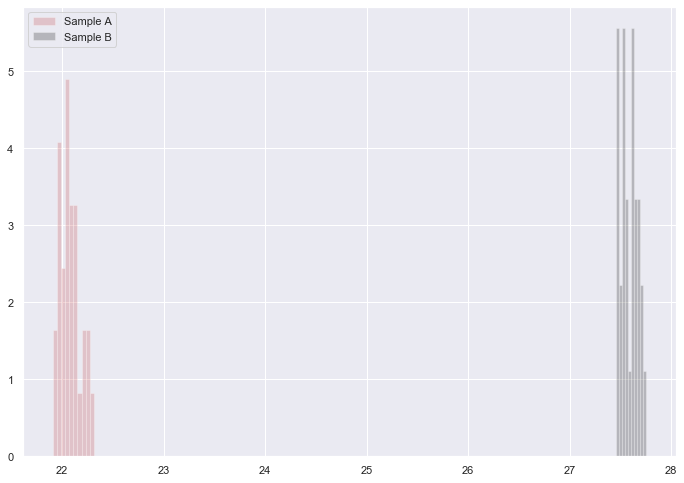

In [77]:
# Plot histograms of the two samples.
plt.hist(sampA, density=True, color='r', alpha=0.25, label="Sample A")
plt.hist(sampB, density=True, color='k', alpha=0.25, label="Sample B")

# Display a legend.
plt.legend()
plt.show()

In [78]:
# with equal length dataset taking 30 rows at random.==> pValue too small, < 0.05 
# we therefore reject the null hypothesis. Mean of house prices equal.
# print(dfr_0['medv'])
# print(dfr_0['medv'].count())

# print(dfr_1['medv'])
# print(dfr_1['medv'].count())
# T test
# print(stats.ttest_ind(dfr_0['medv'], dfr_1['medv']))
print(sampA)
print(sampB)

[22.08911452 22.06796831 21.96025775 22.1114058  22.03330448 22.04664326
 21.98505474 22.06717985 21.98113052 22.07526372 22.02069036 22.00151604
 22.31264031 21.94320839 21.98692956 22.2262664  22.12368352 22.05367547
 22.07516092 22.20319347 21.9779265  22.13186822 22.13759706 22.04097344
 22.18457853 21.97613392 22.05068446 22.23368409 21.90475369 22.24597424]
[27.50924273 27.64122824 27.5604445  27.62071924 27.70016416 27.6548648
 27.53136709 27.54139099 27.5728033  27.53785715 27.51386383 27.48212548
 27.68488473 27.61104148 27.75256982 27.69496973 27.67893342 27.56683875
 27.6134565  27.549806   27.61756445 27.61519157 27.63889762 27.68265736
 27.49471446 27.45292653 27.48201466 27.46341082 27.46295583 27.54201217]


In [79]:
stats.ttest_ind(sampA, sampB)

Ttest_indResult(statistic=-233.1341644825367, pvalue=6.65907073910013e-88)

In [80]:
# Anova... gives the same result as the t-test!
# stats.f_oneway(dfr_0['medv'], dfr_1['medv'])
stats.f_oneway(sampA, sampB)

F_onewayResult(statistic=54351.53864897089, pvalue=6.659070739098569e-88)

***

### 2.1 Calculating the t-statistic

From the WikiPedia pages for [Student's t-test](https://en.wikipedia.org/wiki/Student%27s_t-test#Equal_or_unequal_sample_sizes,_equal_variance) and [Variance](https://en.wikipedia.org/wiki/Variance#Sample_variance).

Note that we are using the calculations for two samples, with equal variances, and possibly different sample sizes. Because the ratio of [0:1] is  471:35, we decided to use equal sample size of 30.

$$ {\displaystyle t={\frac {{\bar {X}}_{1}-{\bar {X}}_{2}}{s_{p}\cdot {\sqrt {{\frac {1}{n_{1}}}+{\frac {1}{n_{2}}}}}}}} $$

$$ {\displaystyle s_{p}={\sqrt {\frac {\left(n_{1}-1\right)s_{X_{1}}^{2}+\left(n_{2}-1\right)s_{X_{2}}^{2}}{n_{1}+n_{2}-2}}}} $$

$$ {\displaystyle s^{2}={\frac {1}{n-1}}\sum _{i=1}^{n}\left(Y_{i}-{\overline {Y}}\right)^{2}} $$

In [81]:
# # Count the samples.
nA = float(len(sampA))
nB = float(len(sampB))
print(nA)
print(nB)
# # Calculate the means.
mA = sampA.sum() / nA
mB = sampB.sum() / nB

# Sample variances.
varA = ((sampA - mA)**2).sum() / (nA - 1.0)
varB = ((sampB - mB)**2).sum() / (nB - 1.0)

# Pooled standard deviation.
sp = np.sqrt(((nA - 1.0) * varA + (nB - 1.0) * varB) / (nA + nB - 2.0))

# t-statistic
t = (mA - mB) / (sp * np.sqrt((1.0 / nA) + (1.0 / nB)))

print(f"Mean of sample A:       {mA:8.4f}")
print(f"Mean of sample B:       {mB:8.4f}")
print(f"Size of sample A:       {nA:8.4f}")
print(f"Size of sample B:       {nB:8.4f}")
print(f"Variance of sample A:   {varA:8.4f}")
print(f"Variance of sample B:   {varB:8.4f}")
print(f"Pooled std dev:         {sp:8.4f}")
print(f"t-statistic:            {t:8.4f}")

30.0
30.0
Mean of sample A:        22.0749
Mean of sample B:        27.5824
Size of sample A:        30.0000
Size of sample B:        30.0000
Variance of sample A:     0.0100
Variance of sample B:     0.0067
Pooled std dev:           0.0915
t-statistic:            -233.1342


### Note that the t-statistics is same as t-test from earlier...

#### 2.1.1 Critical values

For a two-tail test (e.g. $H_0$: the means are equal) we reject the null hypothesis $H_0$ if the value of the t-statistic from the samples is further away from zero than the t-statistic at the ($0.5 / 2.0 =$) $0.025$ level.

2.0017174830120923


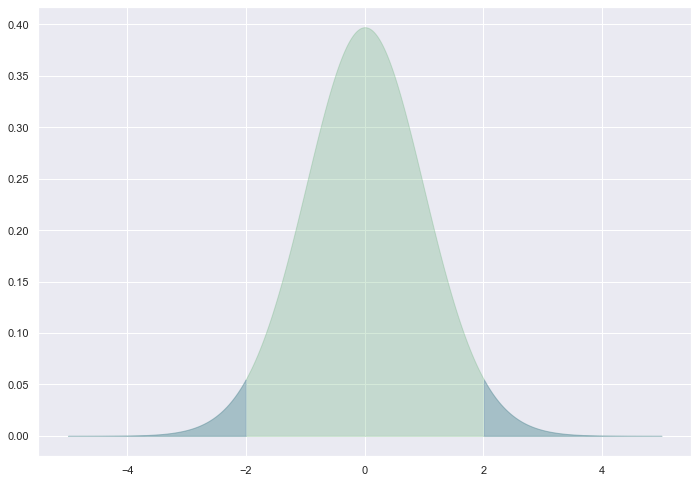

In [82]:
# x values for plotting.
x = np.linspace(-5.0, 5.0, 1000)

# The probability density functions (PDFs) for the t distribution.
# The number of degrees of freedom is (nA + nB - 2).
pdf = stats.t.pdf(x, (nA + nB - 2.0))

# Create a dataframe from x and pdf.
df = pd.DataFrame({'x': x, 'y': pdf})

# Plot the overall distribution.
plt.fill_between(df['x'], df['y'], color='g', alpha=0.25)

# Plot the values more extreme than our |t|.
crit = np.abs(stats.t.ppf(0.975, nA + nB - 2.0))
tail1 = df[df['x'] >=  crit]
tail2 = df[df['x'] <= -crit]
plt.fill_between(tail1['x'], tail1['y'], color='b', alpha=0.25)
plt.fill_between(tail2['x'], tail2['y'], color='b', alpha=0.25)

print(crit)

plt.show()

t-statistics is much lesser than the critical value therefore __we reject__ the null hypothesis. The mean of house prices - those along & those not along the river are certainly different. 

***
## 3. Prediction
***

NOTE: Kaggle account opened & housing.csv dataset downloaded - Today 3rd October, 2019
# References:
#### [1] Python Software Foundation: https://www.python.org/
#### [2] SciPy developers: https://www.scipy.org/
#### [3] Keras: https://keras.io/
#### [4] Project Jupyter: https://jupyter.org/
#### [5] Housing Values in Suburbs of Boston: https://www.kaggle.com/c/boston-housing.
#### [6] Online Resources: https://www.weirdgeek.com/2018/12/linear-regression-to-boston-housing-dataset/ 
#### [7] Wiki: https://en.wikipedia.org/wiki/Multicollinearity